# Face Recognition in the New Conx

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# set up pose recognizer network

from conx import Network, Layer, SGD

# uncomment one of the following lines:
datafile, rows, cols = 'cmu_faces_full_size', 120, 128
#datafile, rows, cols = 'cmu_faces_half_size', 60, 64
#datafile, rows, cols = 'cmu_faces_quarter_size', 30, 32

net = Network("Pose recognizer")
net.add(Layer('input', rows*cols))
net.add(Layer('hidden', 3, activation='sigmoid'))
net.add(Layer('output', 4, activation='sigmoid'))
net.connect()
net.compile(loss='mean_squared_error', optimizer=SGD(lr=0.3, momentum=0.1))

net.dataset.get(datafile)

net.dataset.split(0.40)  # use 40% of the dataset for validation


conx, version 3.3.5
Using Theano backend.


In [3]:
net.dataset.summary()

Input Summary:
   count  : 624 (375 for training, 249 for testing)
   shape  : (15360,)
   range  : (0.0, 1.0)
Target Summary:
   count  : 624 (375 for training, 249 for testing)
   shape  : (4,)
   range  : (0, 1)


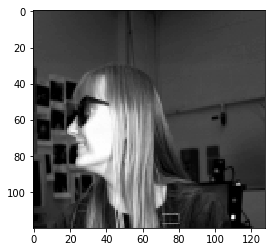

In [4]:
plt.imshow(net.dataset._inputs[0].reshape((rows,cols)), cmap='gray')
plt.show()

In [5]:
net.dataset.targets[0]

[1, 0, 0, 0]

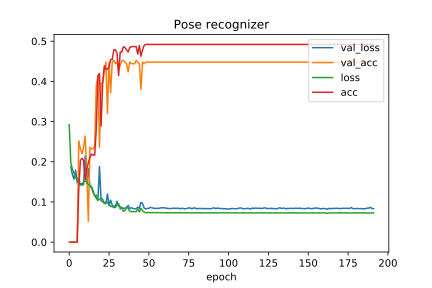

#  200 |   0.07270 |   0.49198 |   0.08366 |   0.44800 


In [6]:
net.train(200, accuracy=1.0, tolerance=0.25, batch_size=1, report_rate=10, plot=True)

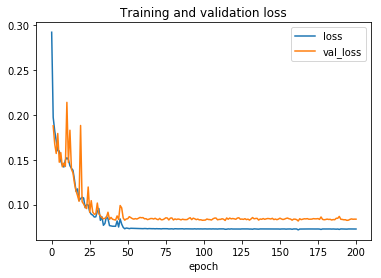

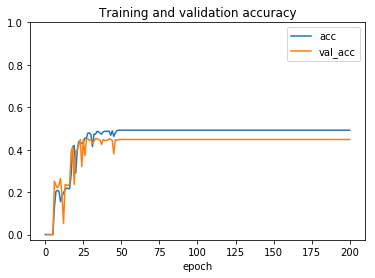

In [7]:
net.plot(['loss', 'val_loss'], title="Training and validation loss")
net.plot(['acc', 'val_acc'], ymax=1, title="Training and validation accuracy")

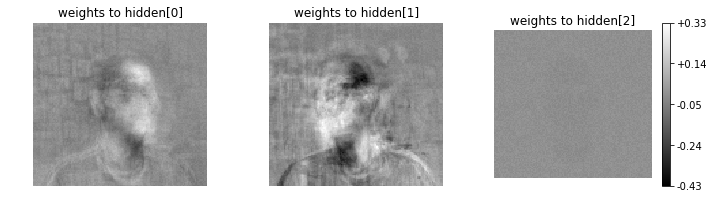

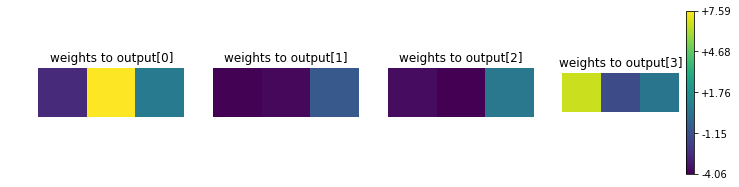

In [8]:
net.plot_layer_weights('hidden', vshape=(rows,cols))
net.plot_layer_weights('output', cmap='viridis')

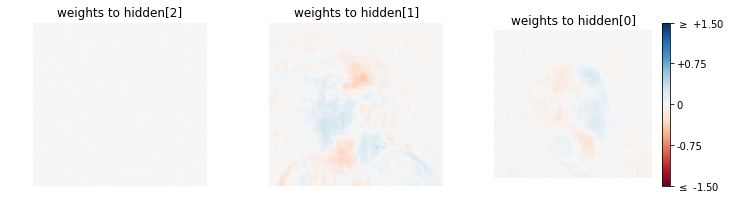

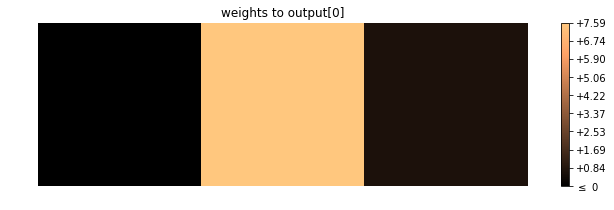

In [9]:
# colorbar colors or values can be easily changed
net.plot_layer_weights('hidden', vshape=(rows,cols), units=(2,1,0), cmap="RdBu", wrange=(-1.5, 1.5))
net.plot_layer_weights('output', units=0, wmin=0, cmap="copper", ticks=10)

In [10]:
net.show_unit_weights('output', 0)

-2.64  7.59  0.70 
